In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [4]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

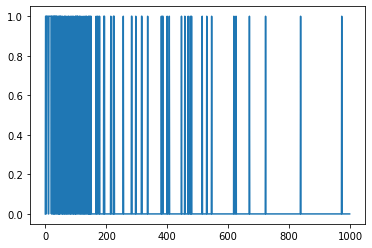

In [5]:
plt.plot(train_data[0])

In [6]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 2s - loss: 0.5809 - accuracy: 0.7068 - binary_crossentropy: 0.5809 - val_loss: 0.4373 - val_accuracy: 0.8142 - val_binary_crossentropy: 0.4373
Epoch 2/20
49/49 - 0s - loss: 0.3754 - accuracy: 0.8405 - binary_crossentropy: 0.3754 - val_loss: 0.3451 - val_accuracy: 0.8532 - val_binary_crossentropy: 0.3451
Epoch 3/20
49/49 - 0s - loss: 0.3246 - accuracy: 0.8650 - binary_crossentropy: 0.3246 - val_loss: 0.3347 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3347
Epoch 4/20
49/49 - 0s - loss: 0.3097 - accuracy: 0.8714 - binary_crossentropy: 0.3097 - val_loss: 0.3278 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3278
Epoch 5/20
49/49 - 0s - loss: 0.3020 - accuracy: 0.8766 - binary_crossentropy: 0.3020 - val_loss: 0.3286 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3286
Epoch 6/20
49/49 - 0s - loss: 0.2987 - accuracy: 0.8766 - binary_crossentropy: 0.2987 - val_loss: 0.3318 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3318
Epoch 7/20
49/49 - 0s - loss

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [10]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6143 - accuracy: 0.6698 - binary_crossentropy: 0.6143 - val_loss: 0.5075 - val_accuracy: 0.7847 - val_binary_crossentropy: 0.5075
Epoch 2/20
49/49 - 0s - loss: 0.4304 - accuracy: 0.8230 - binary_crossentropy: 0.4304 - val_loss: 0.3873 - val_accuracy: 0.8412 - val_binary_crossentropy: 0.3873
Epoch 3/20
49/49 - 0s - loss: 0.3536 - accuracy: 0.8581 - binary_crossentropy: 0.3536 - val_loss: 0.3489 - val_accuracy: 0.8541 - val_binary_crossentropy: 0.3489
Epoch 4/20
49/49 - 0s - loss: 0.3257 - accuracy: 0.8676 - binary_crossentropy: 0.3257 - val_loss: 0.3362 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3362
Epoch 5/20
49/49 - 0s - loss: 0.3147 - accuracy: 0.8713 - binary_crossentropy: 0.3147 - val_loss: 0.3357 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3357
Epoch 6/20
49/49 - 0s - loss: 0.3086 - accuracy: 0.8736 - binary_crossentropy: 0.3086 - val_loss: 0.3290 - val_accuracy: 0.8605 - val_binary_crossentropy: 0.3290
Epoch 7/20
49/49 - 0s - loss

In [11]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [12]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4340 - accuracy: 0.7950 - binary_crossentropy: 0.4340 - val_loss: 0.3295 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3295
Epoch 2/20
49/49 - 0s - loss: 0.2893 - accuracy: 0.8813 - binary_crossentropy: 0.2893 - val_loss: 0.3252 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3252
Epoch 3/20
49/49 - 0s - loss: 0.2242 - accuracy: 0.9121 - binary_crossentropy: 0.2242 - val_loss: 0.3368 - val_accuracy: 0.8556 - val_binary_crossentropy: 0.3368
Epoch 4/20
49/49 - 0s - loss: 0.1075 - accuracy: 0.9673 - binary_crossentropy: 0.1075 - val_loss: 0.4192 - val_accuracy: 0.8459 - val_binary_crossentropy: 0.4192
Epoch 5/20
49/49 - 0s - loss: 0.0266 - accuracy: 0.9956 - binary_crossentropy: 0.0266 - val_loss: 0.5389 - val_accuracy: 0.8485 - val_binary_crossentropy: 0.5389
Epoch 6/20
49/49 - 0s - loss: 0.0054 - accuracy: 0.9997 - binary_crossentropy: 0.0054 - val_loss: 0.6242 - val_accuracy: 0.8488 - val_binary_crossentropy: 0.6242
Epoch 7/20
49/49 - 0s - loss

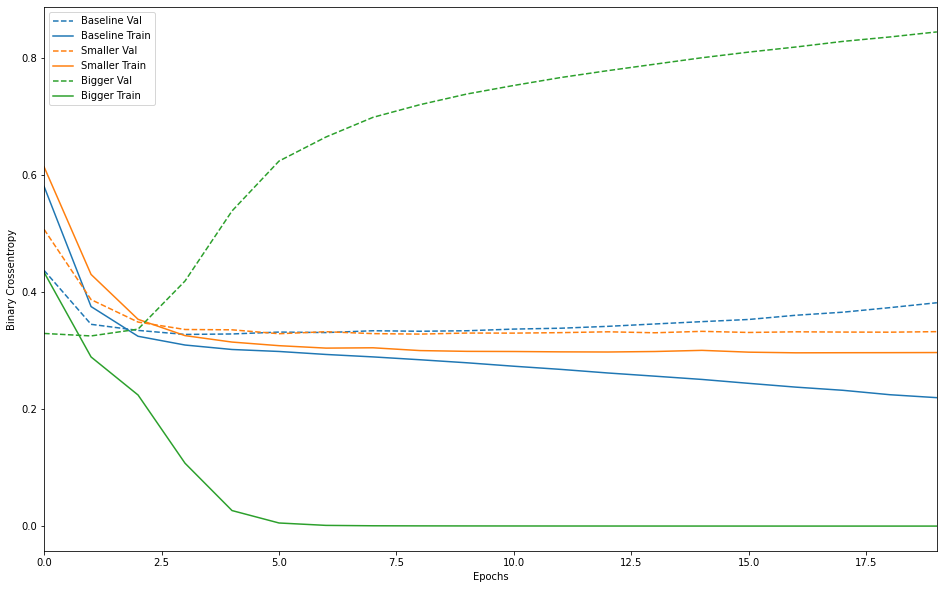

In [13]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [14]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6360 - accuracy: 0.7065 - binary_crossentropy: 0.5931 - val_loss: 0.4908 - val_accuracy: 0.8132 - val_binary_crossentropy: 0.4496
Epoch 2/20
49/49 - 0s - loss: 0.4181 - accuracy: 0.8431 - binary_crossentropy: 0.3763 - val_loss: 0.3933 - val_accuracy: 0.8515 - val_binary_crossentropy: 0.3514
Epoch 3/20
49/49 - 0s - loss: 0.3656 - accuracy: 0.8660 - binary_crossentropy: 0.3242 - val_loss: 0.3721 - val_accuracy: 0.8598 - val_binary_crossentropy: 0.3314
Epoch 4/20
49/49 - 0s - loss: 0.3520 - accuracy: 0.8715 - binary_crossentropy: 0.3120 - val_loss: 0.3755 - val_accuracy: 0.8571 - val_binary_crossentropy: 0.3363
Epoch 5/20
49/49 - 0s - loss: 0.3466 - accuracy: 0.8722 - binary_crossentropy: 0.3081 - val_loss: 0.3650 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3272
Epoch 6/20
49/49 - 0s - loss: 0.3409 - accuracy: 0.8747 - binary_crossentropy: 0.3038 - val_loss: 0.3645 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3280
Epoch 7/20
49/49 - 0s - loss

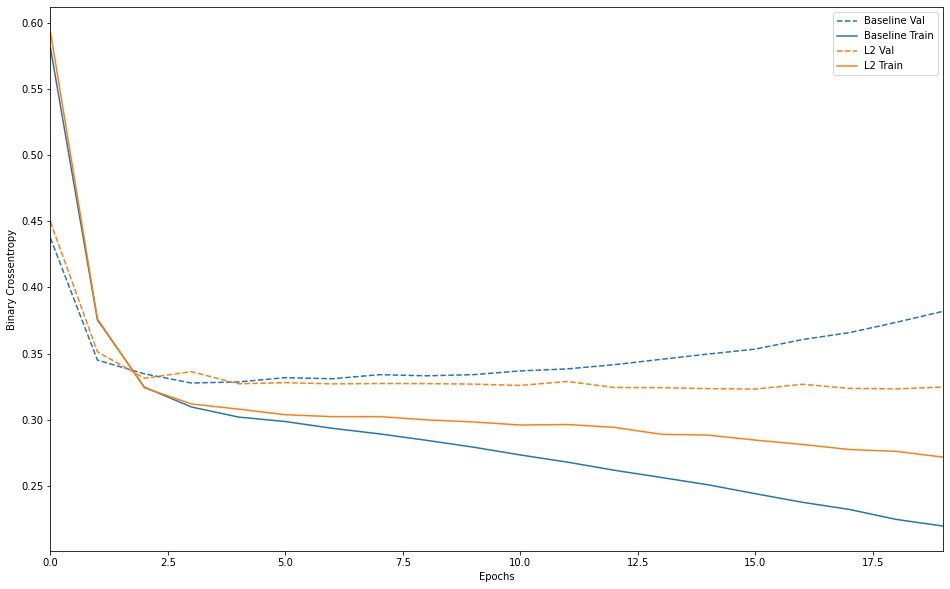

In [15]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [16]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6858 - accuracy: 0.5466 - binary_crossentropy: 0.6858 - val_loss: 0.6318 - val_accuracy: 0.7303 - val_binary_crossentropy: 0.6318
Epoch 2/20
49/49 - 0s - loss: 0.6079 - accuracy: 0.6642 - binary_crossentropy: 0.6079 - val_loss: 0.4875 - val_accuracy: 0.8149 - val_binary_crossentropy: 0.4875
Epoch 3/20
49/49 - 0s - loss: 0.5113 - accuracy: 0.7532 - binary_crossentropy: 0.5113 - val_loss: 0.3968 - val_accuracy: 0.8394 - val_binary_crossentropy: 0.3968
Epoch 4/20
49/49 - 0s - loss: 0.4504 - accuracy: 0.7940 - binary_crossentropy: 0.4504 - val_loss: 0.3625 - val_accuracy: 0.8492 - val_binary_crossentropy: 0.3625
Epoch 5/20
49/49 - 0s - loss: 0.4188 - accuracy: 0.8180 - binary_crossentropy: 0.4188 - val_loss: 0.3386 - val_accuracy: 0.8566 - val_binary_crossentropy: 0.3386
Epoch 6/20
49/49 - 0s - loss: 0.3972 - accuracy: 0.8295 - binary_crossentropy: 0.3972 - val_loss: 0.3316 - val_accuracy: 0.8591 - val_binary_crossentropy: 0.3316
Epoch 7/20
49/49 - 0s - loss

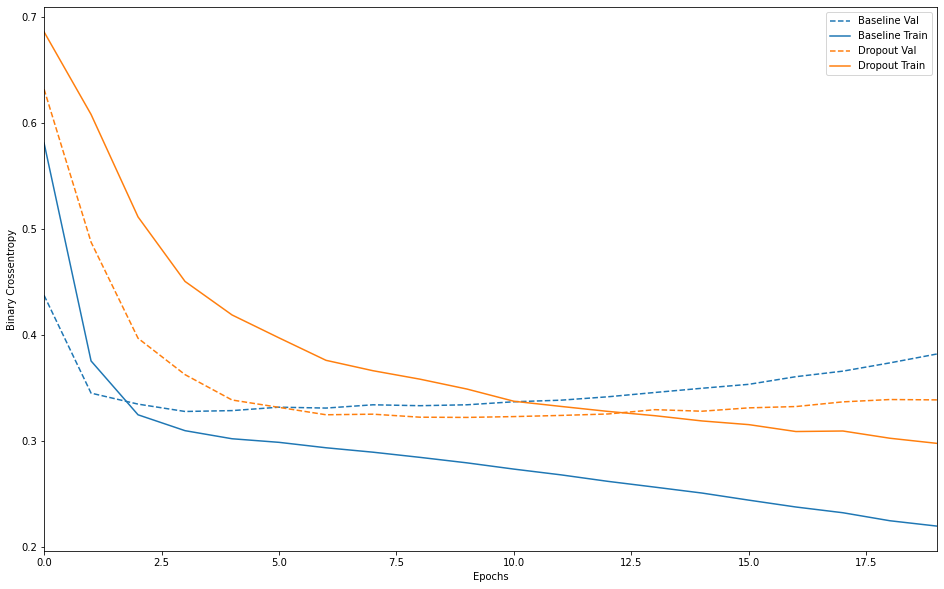

In [17]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])